# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Чтобы получить повторяемость результатов")

Чтобы получить повторяемость результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [9]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [10]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [11]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [13]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

>Пропуски в столбцах mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [14]:
len(df_train[df_train.drop(columns='selling_price').duplicated()])

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [15]:
df_train[df_train.drop(columns='selling_price').duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [16]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [17]:
df_train=df_train.drop_duplicates(subset=['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'])

In [18]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [19]:
df_train.reset_index(drop= True , inplace= True )

In [20]:
df_train.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [21]:
import re
def find_decimal(x):
    try:
        return float(re.findall(r'\d+\.?\d+',x)[0])
    except Exception:
        return 'NaN'

In [22]:
df_train['mileage'][df_train['mileage'].notna()]=df_train['mileage'][df_train['mileage'].notna()].apply(find_decimal)

In [23]:
df_train['engine'][df_train['engine'].notna()]=df_train['engine'][df_train['engine'].notna()].apply(find_decimal)
df_train['max_power'][df_train['max_power'].notna()]=df_train['max_power'][df_train['max_power'].notna()].apply(find_decimal)

In [24]:
df_test['mileage'][df_test['mileage'].notna()]=df_test['mileage'][df_test['mileage'].notna()].apply(find_decimal)
df_test['engine'][df_test['engine'].notna()]=df_test['engine'][df_test['engine'].notna()].apply(find_decimal)
df_test['max_power'][df_test['max_power'].notna()]=df_test['max_power'][df_test['max_power'].notna()].apply(find_decimal)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_21632\2832602543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['mileage'][df_test['mileage'].notna()]=df_test['mileage'][df_test['mileage'].notna()].apply(find_decimal)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_21632\2832602543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['engine'][df_test['engine'].notna()]=df_test['engine'][df_test['engine'].notna()].apply(find_decimal)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_21632\2832602543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [25]:
df_train=df_train.drop(columns='torque')

In [26]:
df_test=df_test.drop(columns='torque')

In [27]:
data_types_dict={'mileage':float,'engine':float,'max_power':float}

In [28]:
df_train=df_train.astype(data_types_dict)
df_test=df_test.astype(data_types_dict)

In [29]:
description=df_train.describe()

In [30]:
description.to_csv('C:/Users/Vlad/Downloads/description.csv',sep=',') #сохраняем файл со статистикой по трейну, он понадобится для заполнения пропусков в датасете в сервисе

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [31]:
df_test['mileage']=df_test['mileage'].fillna(df_train['mileage'].median())
df_test['engine']=df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power']=df_test['max_power'].fillna(df_train['max_power'].median())
df_test['seats']=df_test['seats'].fillna(df_train['seats'].median())

In [32]:
df_train['mileage']=df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine']=df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power']=df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats']=df_train['seats'].fillna(df_train['seats'].median())

In [33]:
df_test.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [34]:
df_train.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [35]:
print("Потому что от числа мест зависит тип автомобиля")

Потому что от числа мест зависит тип автомобиля


In [36]:
df_train=df_train.astype({'engine':int,'seats':int})
df_test=df_test.astype({'engine':int,'seats':int})

In [37]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

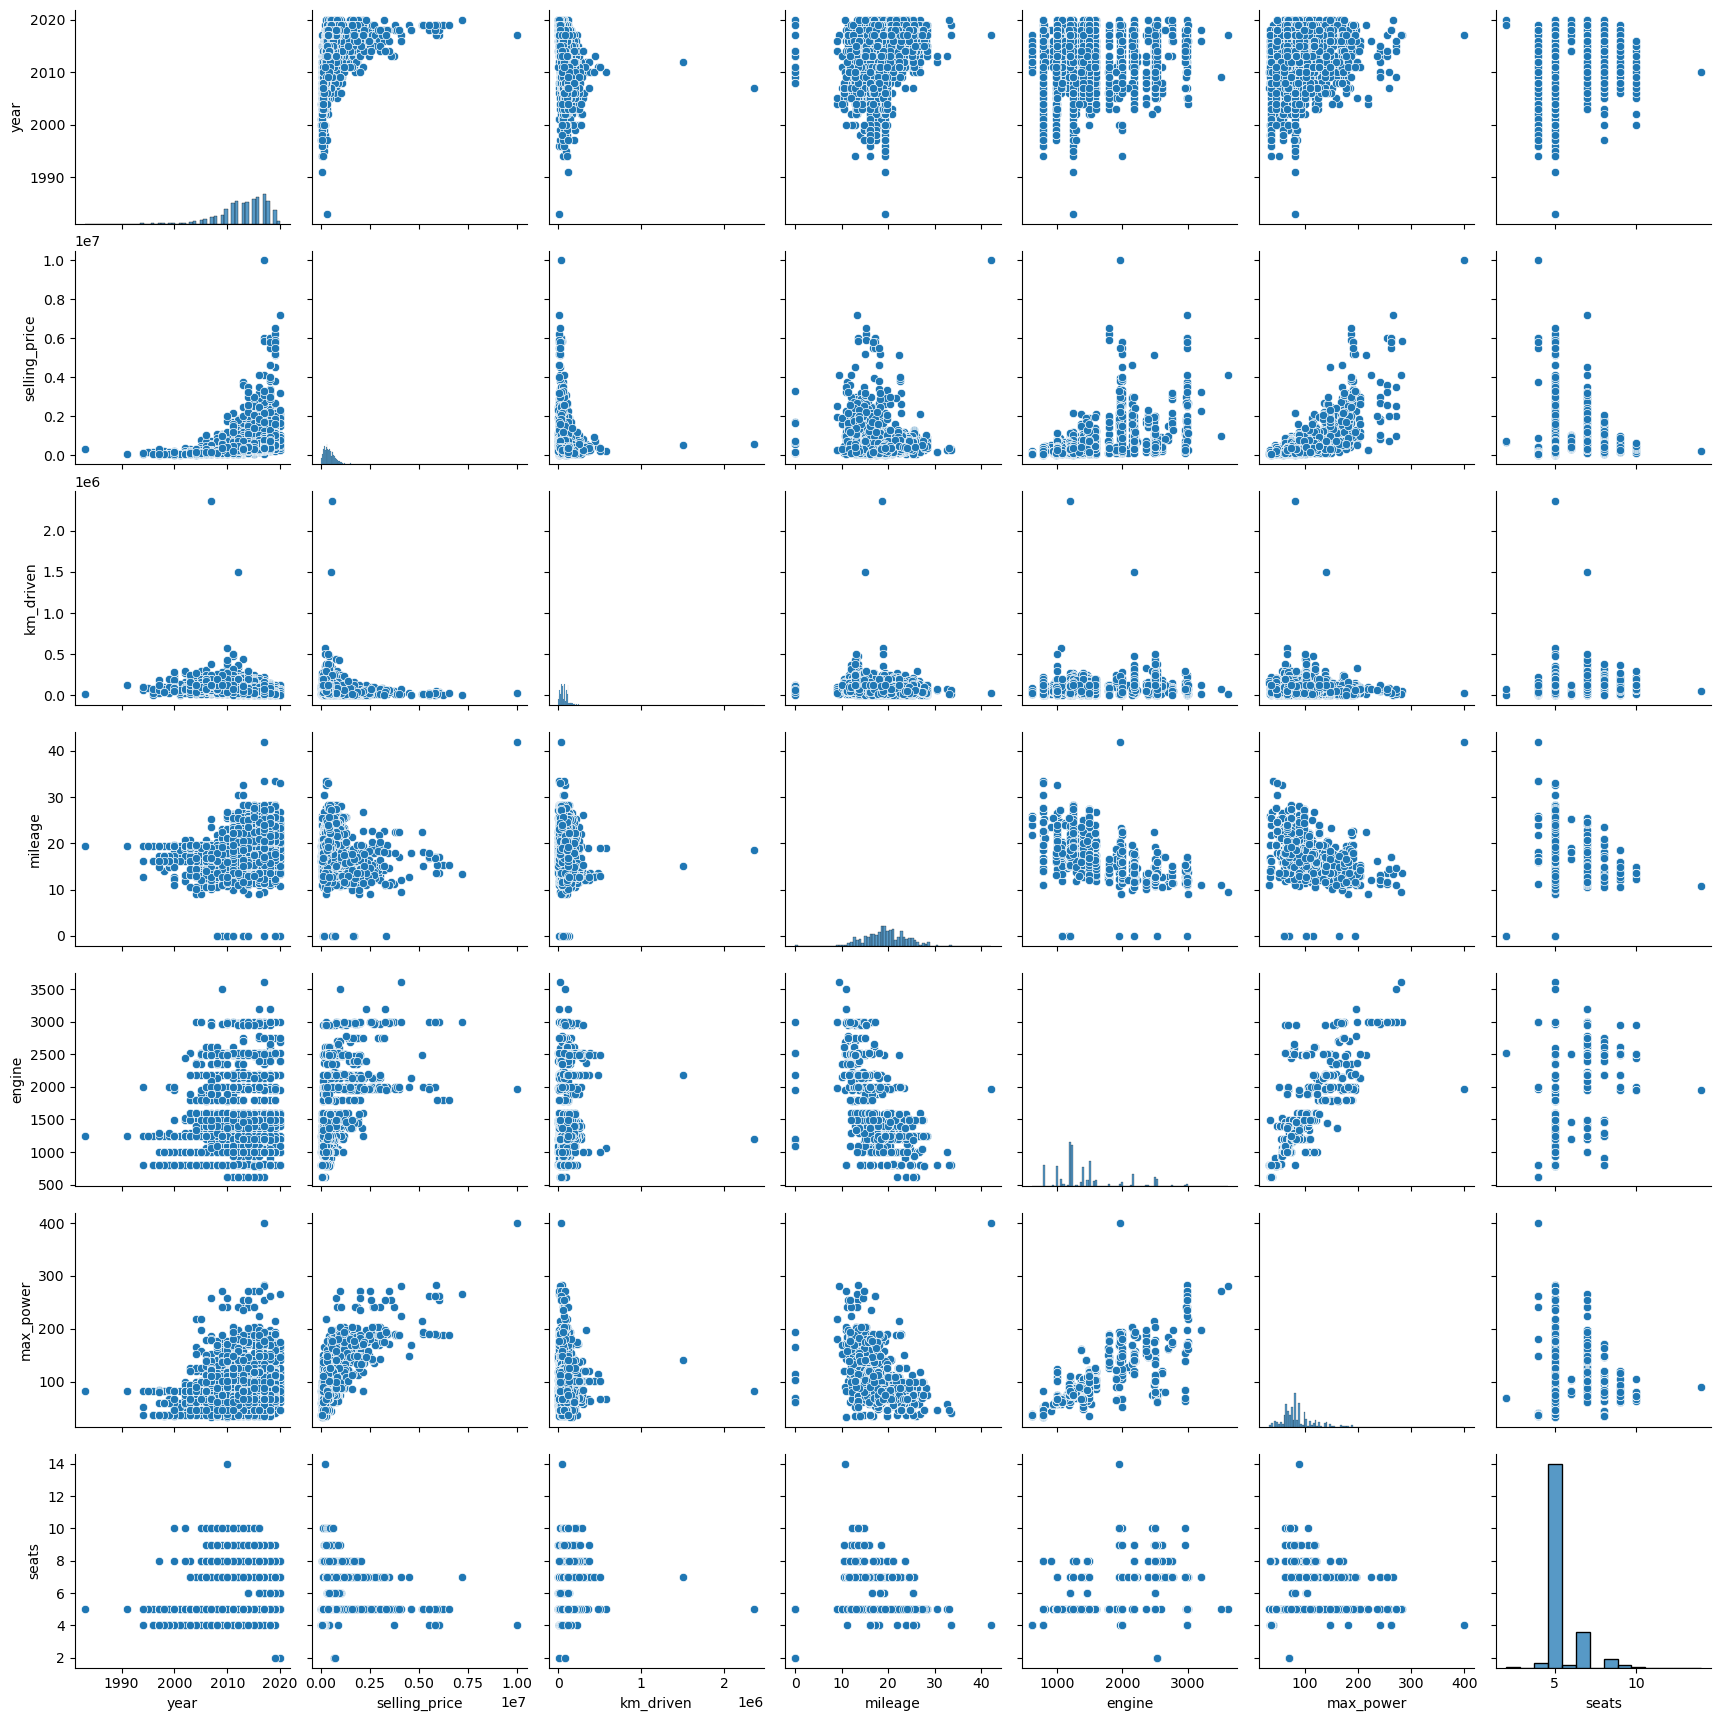

In [139]:
sns.pairplot(df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner']))
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

>Есть явно выраженная связь между ценой автомобиля и его годом (прямая), пробегом (обратная), объёмом двагателя (прямая), мощностью двигателя (прямая), количеством мест (обратная).

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

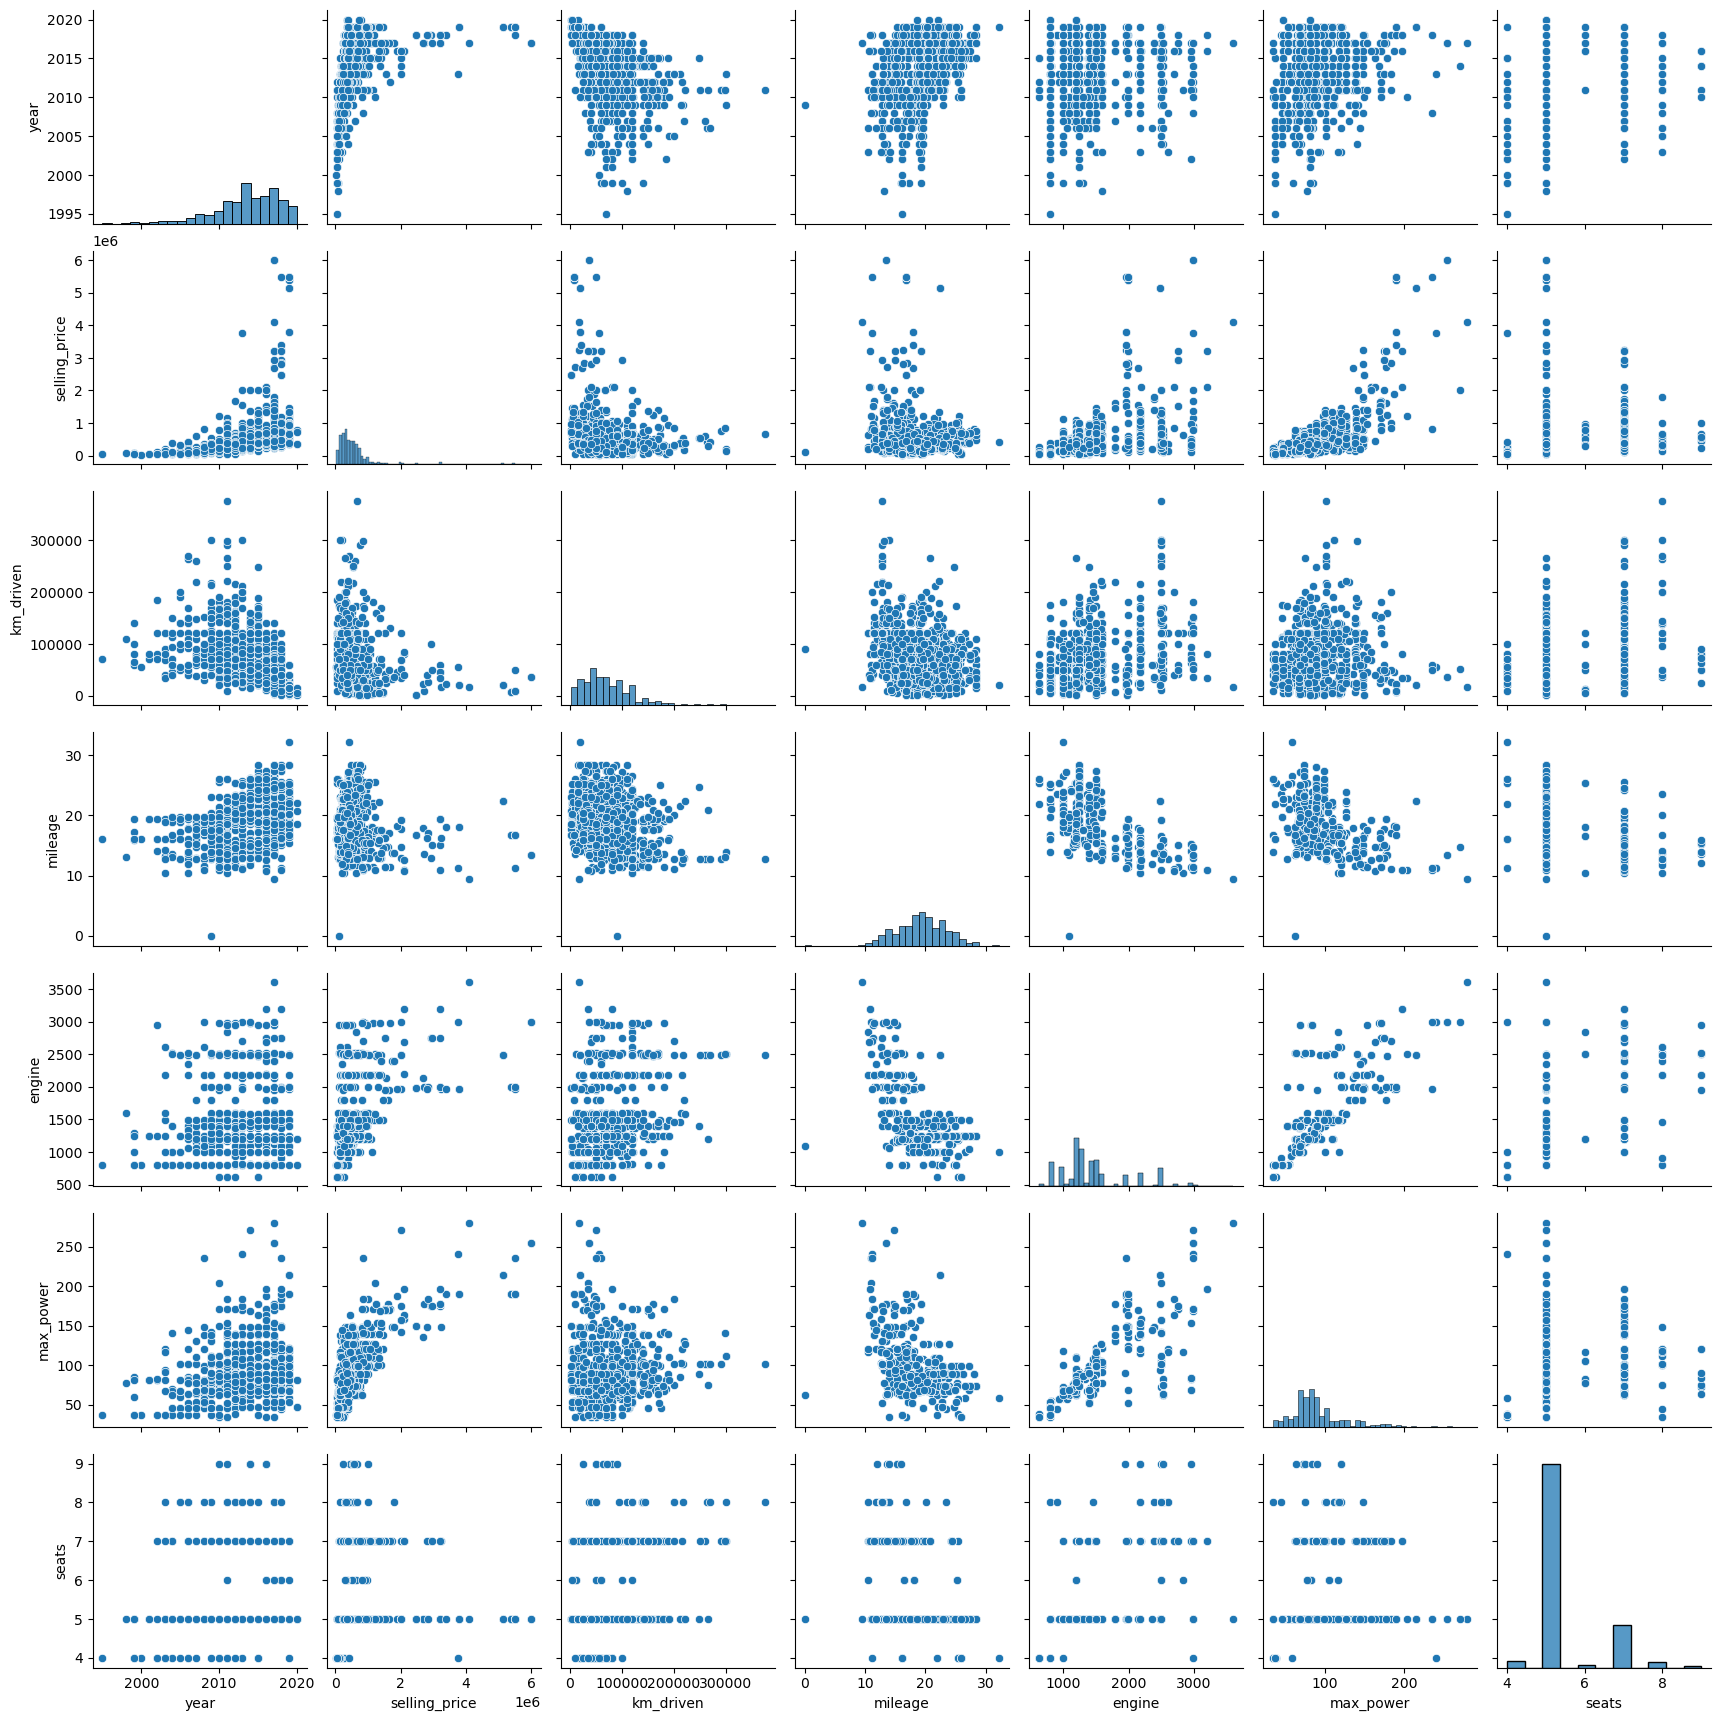

In [140]:
sns.pairplot(df_test.drop(columns=['name','fuel','seller_type','transmission', 'owner']))
plt.show()

>В целом распределения для тренировочной и тестовой выборок похожи, однако в тренировочной выборке больше выбросов.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

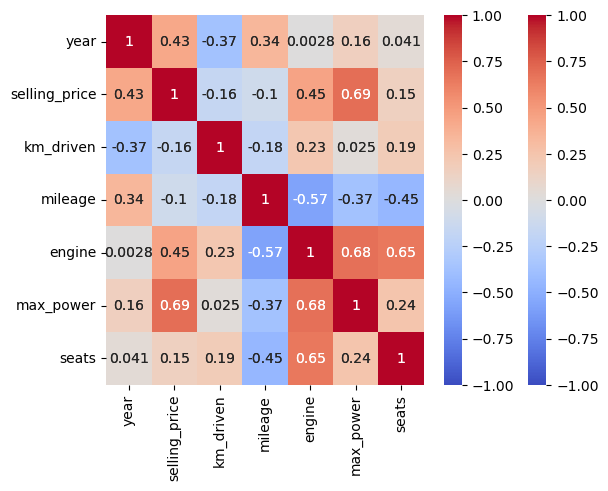

In [131]:
sns.heatmap(df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner']).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

>Наиболее скоррелированы максимальная мощность и цена автомобиля. Сильная линейная зависимость между ценой и мощьностью, мощностью и объёмом двигателя, объёмом двигателя и количеством сидений, ценой и объёмом двигателя. Между годом и пробегом существует обратная зависимость, так что, да, чем меньше год, тем больше пробег. 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

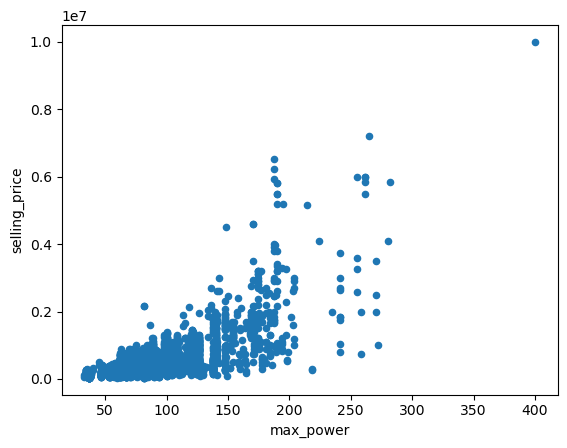

In [141]:
df_train.plot.scatter(x='max_power',y='selling_price')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [38]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price'])

In [39]:
assert X_train.shape == (5840, 6)

In [40]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price'])

In [41]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_pred= model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

In [43]:
print(f'train MSE: {MSE(y_train,train_pred)}')
print(f'train r2_score: {r2_score(y_train,train_pred)}')

train MSE: 116601673169.11017
train r2_score: 0.5932097784368069


In [44]:
print(f'test MSE: {MSE(y_test,test_pred)}')
print(f'test r2_score: {r2_score(y_test,test_pred)}')

test MSE: 233002359160.80444
test r2_score: 0.5946576472666429


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [45]:
from sklearn.preprocessing import StandardScaler

data_columns=list(X_train.columns)
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(data=X_train,columns=data_columns)
X_test=pd.DataFrame(data=X_test,columns=data_columns)

In [46]:
model_lr_s = LinearRegression()
model_lr_s.fit(X_train, y_train)
train_pred= model_lr_s.predict(X_train)
test_pred = model_lr_s.predict(X_test)

In [47]:
print(f'train MSE: {MSE(y_train,train_pred)}')
print(f'train r2_score: {r2_score(y_train,train_pred)}')

train MSE: 116601673169.1101
train r2_score: 0.5932097784368071


In [48]:
print(f'test MSE: {MSE(y_test,test_pred)}')
print(f'test r2_score: {r2_score(y_test,test_pred)}')

test MSE: 233002359160.79764
test r2_score: 0.5946576472666549


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [49]:
pd.DataFrame(data=model_lr_s.coef_.reshape(1,6),columns=data_columns)

,year,km_driven,mileage,engine,max_power,seats
0,152247.330869,-44066.180213,29319.181026,59324.980365,324496.857821,-22159.187867


>Наиболее информативный признак - максимальная мощьность двигателя.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [50]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
train_pred= model_lasso.predict(X_train)
test_pred = model_lasso.predict(X_test)

In [51]:
print(f'train MSE: {MSE(y_train,train_pred)}')
print(f'train r2_score: {r2_score(y_train,train_pred)}')

train MSE: 116601673179.23553
train r2_score: 0.5932097784014825


In [52]:
print(f'test MSE: {MSE(y_test,test_pred)}')
print(f'test r2_score: {r2_score(y_test,test_pred)}')

test MSE: 233003029462.26755
test r2_score: 0.5946564811772821


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [53]:
pd.DataFrame(data=model_lasso.coef_.reshape(1,6),columns=data_columns)

,year,km_driven,mileage,engine,max_power,seats
0,152247.147427,-44065.050854,29317.300554,59320.137094,324497.751891,-22156.305245


>Нет, потому что по-умолчанию коэффициент реализации равен 1, что мало по сравнению с размером весов, которые даёт модель.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [54]:
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':np.linspace(0.1,20000.0,num=20)}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=10)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-01, 1.05272632e+03, 2.10535263e+03, 3.15797895e+03,
       4.21060526e+03, 5.26323158e+03, 6.31585789e+03, 7.36848421e+03,
       8.42111053e+03, 9.47373684e+03, 1.05263632e+04, 1.15789895e+04,
       1.26316158e+04, 1.36842421e+04, 1.47368684e+04, 1.57894947e+04,
       1.68421211e+04, 1.78947474e+04, 1.89473737e+04, 2.00000000e+04])},
             scoring='r2')

In [55]:
lasso_regressor.best_params_

{'alpha': 20000.0}

In [56]:
lasso_regressor.best_score_

0.575384331414057

In [57]:
lasso_predict=lasso_regressor.predict(X_test)

In [58]:
print(f'test MSE: {MSE(y_test,lasso_predict)}')
print(f'test r2_score: {r2_score(y_test,lasso_predict)}')

test MSE: 245920646638.45758
test r2_score: 0.572184359621242


In [59]:
lasso_regressor.cv_results_

{'mean_fit_time': array([0.03969824, 0.02054384, 0.01528099, 0.01849446, 0.01658504,
        0.0176369 , 0.01683621, 0.01235633, 0.01242423, 0.00961177,
        0.01522529, 0.01204214, 0.01179335, 0.01764841, 0.0119662 ,
        0.01203556, 0.0115252 , 0.00992126, 0.01200821, 0.0112319 ]),
 'std_fit_time': array([0.01057341, 0.00380202, 0.00436235, 0.00381232, 0.00272601,
        0.00319756, 0.0055937 , 0.00446101, 0.00377045, 0.00351253,
        0.00240915, 0.00523901, 0.00384474, 0.00484424, 0.00396447,
        0.00400063, 0.00377371, 0.00331778, 0.00400088, 0.00393495]),
 'mean_score_time': array([0.00336967, 0.00430274, 0.00319886, 0.00320065, 0.00426974,
        0.00240018, 0.00239937, 0.00446036, 0.00360763, 0.00586064,
        0.        , 0.00480664, 0.0034575 , 0.        , 0.00330746,
        0.00050681, 0.00290389, 0.00364692, 0.00405841, 0.0024009 ]),
 'std_score_time': array([0.00363631, 0.00378894, 0.00391779, 0.00391998, 0.00370685,
        0.00366634, 0.0036651 , 0.003772

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

>Число обученных моделей равно количеству перебранных параметров, умноженному на количество фолдов, т.е. 200

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

>Лучший коэффициент 20000. Занулились веса, соответсвующие mileage и количеству мест.

In [60]:
model_lasso_2 = Lasso(alpha=20000.0)
model_lasso_2.fit(X_train, y_train)
train_pred= model_lasso_2.predict(X_train)
test_pred = model_lasso_2.predict(X_test)

In [61]:
print(f'train MSE: {MSE(y_train,train_pred)}')
print(f'train r2_score: {r2_score(y_train,train_pred)}')

train MSE: 118619300790.5712
train r2_score: 0.5861708469630211


In [62]:
print(f'test MSE: {MSE(y_test,test_pred)}')
print(f'test r2_score: {r2_score(y_test,test_pred)}')

test MSE: 245920646638.45758
test r2_score: 0.572184359621242


In [63]:
pd.DataFrame(data=model_lasso_2.coef_.reshape(1,6),columns=data_columns)

,year,km_driven,mileage,engine,max_power,seats
0,149317.798163,-21278.774285,0.0,273.29191,328292.391079,-0.0


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [64]:
from sklearn.linear_model import ElasticNet

elasticnet=ElasticNet()
parameters={'alpha':np.linspace(1.0,20000.0,num=10),'l1_ratio':np.linspace(0.0,1.0,num=11)}
elastic_regressor=GridSearchCV(elasticnet,parameters,scoring='r2',cv=10)
elastic_regressor.fit(X_train, y_train)

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.073e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.099e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.321e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.748e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.602e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.675e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.986e+14, tolerance: 1.597e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.535e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.992e+14, tolerance: 1.599e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.393e+14, tolerance: 1.479e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.821e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.324e+14, tolerance: 1.465e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vlad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.751e+14, tolerance: 1.550e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e+00, 2.22311111e+03, 4.44522222e+03, 6.66733333e+03,
       8.88944444e+03, 1.11115556e+04, 1.33336667e+04, 1.55557778e+04,
       1.77778889e+04, 2.00000000e+04]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

>Коэффициент alpha = 1, l1_ratio = 0.9

In [65]:
elastic_regressor.best_params_

{'alpha': 1.0, 'l1_ratio': 0.9}

In [66]:
elastic_regressor.best_score_

0.5768652658141804

In [67]:
elastic_predict_train=elastic_regressor.predict(X_train)
elastic_predict_test=elastic_regressor.predict(X_test)

In [68]:
print(f'test MSE: {MSE(y_test,elastic_predict_test)}')
print(f'test r2_score: {r2_score(y_test,elastic_predict_test)}')

test MSE: 245577411251.10574
test r2_score: 0.572781468766195


In [69]:
print(f'train MSE: {MSE(y_train,elastic_predict_train)}')
print(f'train r2_score: {r2_score(y_train,elastic_predict_train)}')

train MSE: 117735008563.08594
train r2_score: 0.5892558921546421


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [70]:
X_train_cat=df_train.drop(columns=['name','selling_price'])
len_train=len(X_train_cat)
X_train_cat=X_train_cat.astype({'seats':str})

In [71]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [82]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
data_cat=df_train[['fuel','seller_type','transmission','owner','seats']]
data_cat=data_cat.astype({'seats':str})
onehotencoder=OneHotEncoder(drop='first',handle_unknown='ignore')
onehotencoder.fit(data_cat)
data_new=onehotencoder.transform(data_cat).toarray()
data_cat_new=pd.DataFrame(data=data_new, columns=onehotencoder.get_feature_names_out())
X_train_cat=df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price','seats']).join(data_cat_new)
data_cat=df_test[['fuel','seller_type','transmission','owner','seats']]
data_cat=data_cat.astype({'seats':str})
data_new=onehotencoder.transform(data_cat).toarray()
data_cat_new=pd.DataFrame(data=data_new, columns=onehotencoder.get_feature_names_out())
X_test_cat=df_test.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price','seats']).join(data_cat_new)

Сохраняем модель для кодирования категориальных признаков:

In [40]:
import pickle
file_name='C:/Users/Vlad/Downloads/onehotencoder.pkl'
with open(file_name, 'wb') as file: 
    pickle.dump(onehotencoder, file) 

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':np.linspace(0.1,20000.0,num=20)}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=10)
ridge_regressor.fit(X_train_cat, y_train)
ridge_pred_test=ridge_regressor.predict(X_test_cat)
ridge_pred_train=ridge_regressor.predict(X_train_cat)

In [74]:
print(f'test MSE: {MSE(y_test,ridge_pred_test)}')
print(f'test r2_score: {r2_score(y_test,ridge_pred_test)}')

test MSE: 214275298974.2045
test r2_score: 0.6272361613347208


In [75]:
print(f'train MSE: {MSE(y_train,ridge_pred_train)}')
print(f'train r2_score: {r2_score(y_train,ridge_pred_train)}')

train MSE: 95183286834.06354
train r2_score: 0.6679324636775523


>Да, качество предсказаний улучшилось.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Добавляем новые признаки на основе имеющихся:

In [83]:
X_train_cat['new_1']=X_train_cat.year**2
X_train_cat['new_2']=X_train_cat.max_power/X_train_cat.engine
X_train_cat['new_3']=X_train_cat.max_power**2

In [84]:
X_test_cat['new_1']=X_test_cat.year**2
X_test_cat['new_2']=X_test_cat.max_power/X_test_cat.engine
X_test_cat['new_3']=X_test_cat.max_power**2

In [140]:
ridge=Ridge()
parameters={'alpha':np.linspace(0.01,1.0,num=20)}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=10)
ridge_regressor.fit(X_train_cat, y_train)
ridge_pred_test=ridge_regressor.predict(X_test_cat)
ridge_pred_train=ridge_regressor.predict(X_train_cat)

In [141]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [142]:
print(f'test MSE: {MSE(y_test,ridge_pred_test)}')
print(f'test r2_score: {r2_score(y_test,ridge_pred_test)}')

test MSE: 167415892124.92654
test r2_score: 0.7087550879601261


In [143]:
print(f'train MSE: {MSE(y_train,ridge_pred_train)}')
print(f'train r2_score: {r2_score(y_train,ridge_pred_train)}')

train MSE: 70387153930.18028
train r2_score: 0.754439150277597


In [85]:
ridge=Ridge(alpha=0.01)
ridge.fit(X_train_cat, y_train)
ridge_pred_test=ridge.predict(X_test_cat)
ridge_pred_train=ridge.predict(X_train_cat)

In [86]:
print(f'train MSE: {MSE(y_train,ridge_pred_train)}')
print(f'train r2_score: {r2_score(y_train,ridge_pred_train)}')
print(f'test MSE: {MSE(y_test,ridge_pred_test)}')
print(f'test r2_score: {r2_score(y_test,ridge_pred_test)}')

train MSE: 70387153930.18028
train r2_score: 0.754439150277597
test MSE: 167415892124.92654
test r2_score: 0.7087550879601261


>Качество предсказания модели ещё улучшилось

In [87]:
ridge_pred_test #для проверки корректности работы сервиса

array([ 4.87723972e+05,  8.25885503e+05,  5.34496137e+05,  5.62556221e+05,
        7.32542553e+04,  1.03971097e+06,  1.20099984e+05,  2.00225032e+05,
        6.58993365e+04,  9.19655642e+05,  1.21939613e+06,  2.71137442e+06,
        8.40224216e+05,  5.84597877e+04,  7.18282296e+05,  4.38864389e+06,
        3.61645842e+05,  2.51399985e+05,  4.25733902e+05,  2.24088730e+05,
        2.34309741e+05,  3.12399483e+04,  8.49885516e+05,  6.11923313e+05,
        5.97439141e+05,  6.88424210e+05,  9.51343643e+05,  9.73550911e+05,
        4.12987490e+05,  5.87639049e+05,  1.10203290e+06,  9.92690260e+05,
        5.27708988e+05,  3.26581280e+05,  3.47910350e+05,  2.47403709e+05,
        7.48096745e+05,  3.10575297e+05,  4.57928696e+05,  8.50520249e+05,
        2.98277339e+05,  4.19256901e+05,  1.10223796e+05,  3.85613798e+05,
        3.97328044e+05,  4.13672366e+05,  2.42468935e+05,  6.32916576e+04,
        6.35112874e+05,  7.24969037e+05,  2.71002948e+05,  8.12927946e+04,
        7.58950585e+05,  

In [224]:
X_test_cat

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,new_1,new_2,new_3
0,2010,168000,14.00,2498,112.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4040100,0.044836,12544.0000
1,2017,25000,21.50,1497,108.50,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4068289,0.072478,11772.2500
2,2007,218463,12.90,1799,130.00,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4028049,0.072262,16900.0000
3,2015,173000,25.10,1498,98.60,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4060225,0.065821,9721.9600
4,2011,70000,16.50,1172,65.00,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4044121,0.055461,4225.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4032064,0.062661,4630.8025
996,2017,50000,18.60,1197,81.83,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4068289,0.068363,6696.1489
997,2009,40000,23.00,1396,90.00,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4036081,0.064470,8100.0000
998,2012,25000,20.36,1197,78.90,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4048144,0.065915,6225.2100


Сохраняем самую удачную модель:

In [53]:
file_name='C:/Users/Vlad/Downloads/model.pkl'
with open(file_name, 'wb') as file: 
    pickle.dump(ridge, file) 

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [81]:
def business_metrics(y_true, y_pred):
    assert len(y_true)==len(y_pred)
    target_part=0.1
    try:
        return (np.fabs(y_pred-y_true.values)/y_true.values<=0.1).sum()/len(y_true)
    except Exception as ex:
        print(ex)

business_metrics(y_test,ridge_pred_test)

0.23

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
import pandas as pd
import re
import pickle
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder
import logging

LOGGING = 'logs.log'
logging.basicConfig(
    level=logging.DEBUG,
    filename=LOGGING,
    filemode="w"
)


def find_decimal(x) -> str:
    try:
        return re.findall(r'\d+\.?\d+', x)[0]
    except Exception:
        return 'NaN'

with open('onehotencoder.pkl', 'rb') as file:
    onehotencoder = pickle.load(file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

app = FastAPI()

class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    
    '''Предсказание цены для одной машины. На вход подается описание
    машины, функция возвращает одно число - предсказанную стоимость'''
    
    data = pd.DataFrame(vars(item), index=[0])
    description = pd.read_csv('description.csv', sep=',')
    data['mileage'][data['mileage'].notna()] = data['mileage'][data['mileage'].notna()].apply(find_decimal)
    data['engine'][data['engine'].notna()] = data['engine'][data['engine'].notna()].apply(find_decimal)
    data['max_power'][data['max_power'].notna()] = data['max_power'][data['max_power'].notna()].apply(find_decimal)
    data = data.drop(columns='torque')
    data = data.astype({'mileage': float, 'engine': float, 'max_power': float})
    data['mileage'] = data['mileage'].fillna(description.iloc[5]['mileage'])
    data['engine'] = data['engine'].fillna(description.iloc[5]['engine'])
    data['max_power'] = data['max_power'].fillna(description.iloc[5]['max_power'])
    data['seats'] = data['seats'].fillna(description.iloc[5]['seats'])
    data = data.astype({'engine': int, 'seats': int})
    data_cat = data[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
    data_cat = data_cat.astype({'seats': str})
    try:
        data_new = onehotencoder.transform(data_cat).toarray()
        data_cat_new = pd.DataFrame(data=data_new, columns=onehotencoder.get_feature_names_out())
    except Exception as error:
        logging.error(error)
    X = data.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price', 'seats']).join(data_cat_new)
    X['new_1'] = X.year ** 2
    X['new_2'] = X.max_power / X.engine
    X['new_3'] = X.max_power ** 2
    try:
        pred = model.predict(X)
    except Exception as error:
        logging.error(error)
    return pred


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    
    '''Предсказание стоимости для нескольких машин. На вход подаётся список с
    описанием машин, функция возвращает список предсказанных стоимостей машин'''
    
    data = pd.DataFrame([vars(item) for item in items])
    description = pd.read_csv('description.csv', sep=',')
    data['mileage'][data['mileage'].notna()] = data['mileage'][data['mileage'].notna()].apply(find_decimal)
    data['engine'][data['engine'].notna()] = data['engine'][data['engine'].notna()].apply(find_decimal)
    data['max_power'][data['max_power'].notna()] = data['max_power'][data['max_power'].notna()].apply(find_decimal)
    data = data.drop(columns='torque')
    data = data.astype({'mileage': float, 'engine': float, 'max_power': float})
    data['mileage'] = data['mileage'].fillna(description.iloc[5]['mileage'])
    data['engine'] = data['engine'].fillna(description.iloc[5]['engine'])
    data['max_power'] = data['max_power'].fillna(description.iloc[5]['max_power'])
    data['seats'] = data['seats'].fillna(description.iloc[5]['seats'])
    data = data.astype({'engine': int, 'seats': int})
    data_cat = data[['fuel', 'seller_type', 'transmission', 'owner', 'seats']]
    data_cat = data_cat.astype({'seats': str})
    try:
        data_new = onehotencoder.transform(data_cat).toarray()
        data_cat_new = pd.DataFrame(data=data_new, columns=onehotencoder.get_feature_names_out())
    except Exception as error:
        logging.error(error)
    X = data.drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner', 'selling_price', 'seats']).join(
        data_cat_new)
    X['new_1'] = X.year ** 2
    X['new_2'] = X.max_power / X.engine
    X['new_3'] = X.max_power ** 2
    try:
        pred = model.predict(X)
    except Exception as error:
        logging.error(error)
    return pred

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link